1. Найти  данные  для  задачи  классификации  или  для  задачи  регрессии (данные не должны повторятся в группе). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


In [2]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Разделение данных на обучающую и тестовую выборки
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(df['target'].value_counts())
print(df.isnull().sum())
print(df.head())

target
1    71
0    59
2    48
Name: count, dtype: int64
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           

2. Реализовать баггинг.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import time

In [53]:
# Одно дерево решений
single_tree_model = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
single_tree_model.fit(X_train, y_train)
y_pred_single = single_tree_model.predict(X_test)

# Случайный лес
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

start_time = time.time()
random_forest_model.fit(X_train, y_train)
end_time = time.time()

print(f"Время обучения: {end_time - start_time:.4f} с")

# Вычисление точности
accuracy_single_tree = np.mean(y_pred_single == y_test)
accuracy_random_forest = np.mean(y_pred_forest == y_test)

Время обучения: 0.0684 с


Accuracy для одного дерева: 0.94
Accuracy для случайного леса: 0.96


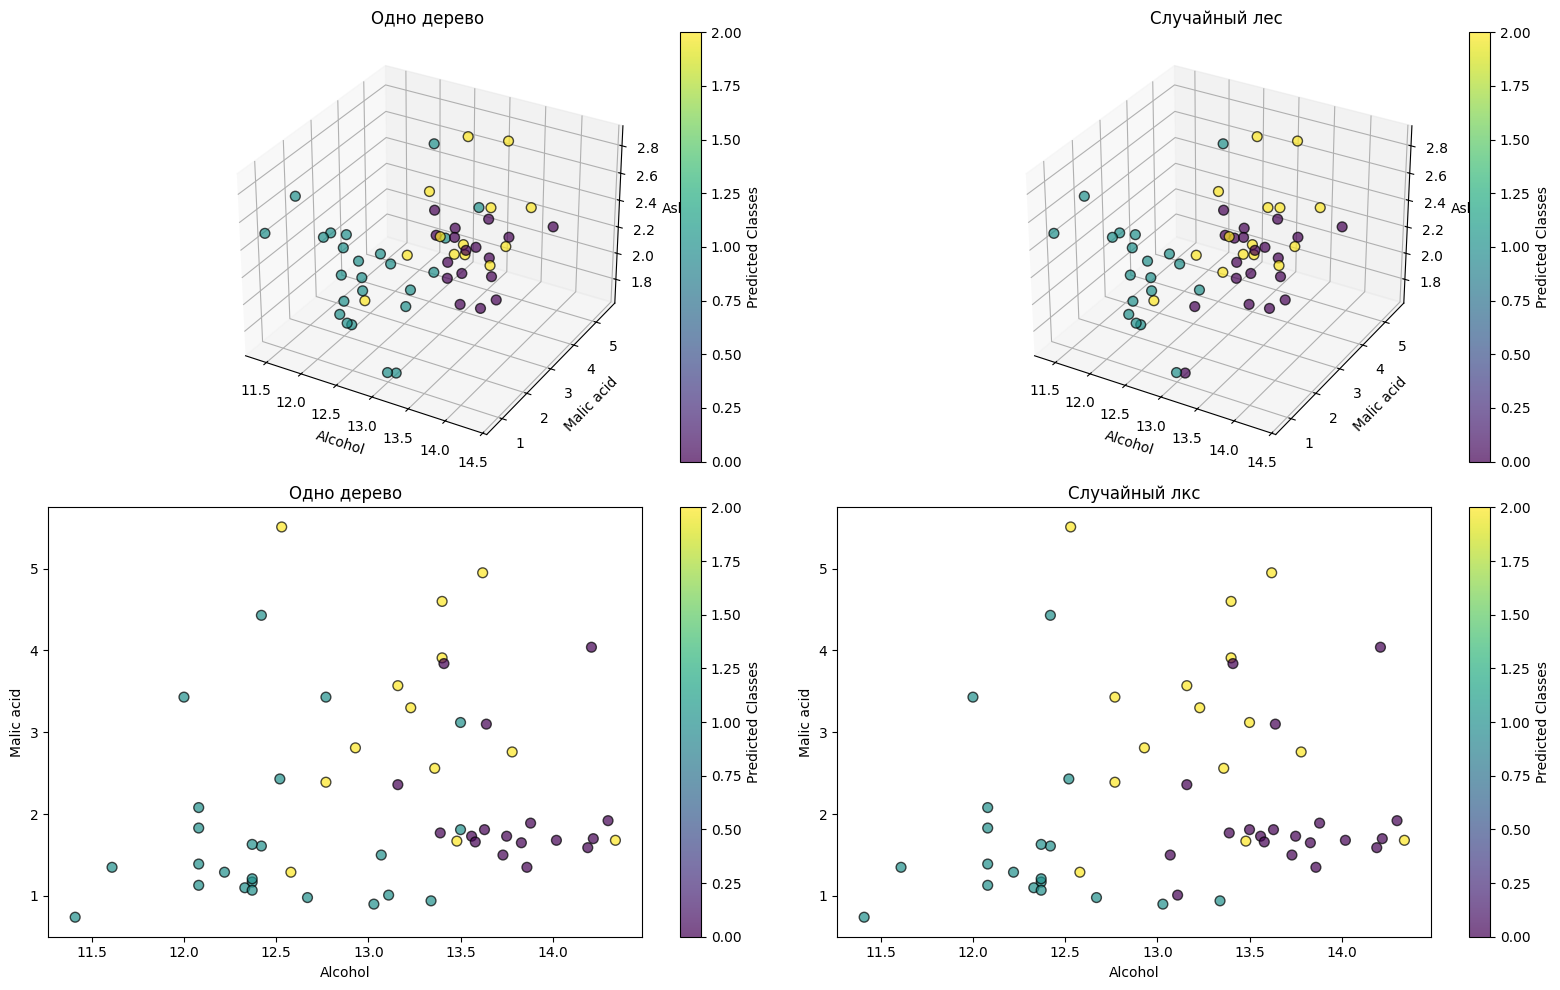

In [54]:
print(f"Accuracy для одного дерева: {accuracy_single_tree:.2f}")
print(f"Accuracy для случайного леса: {accuracy_random_forest:.2f}")


fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], 
                       c=y_pred_single, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
ax1.set_title('Одно дерево')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')
ax1.set_zlabel('Ash')
plt.colorbar(scatter1, ax=ax1, label='Predicted Classes')

ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], 
                       c=y_pred_forest, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
ax2.set_title('Случайный лес')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic acid')
ax2.set_zlabel('Ash')
plt.colorbar(scatter2, ax=ax2, label='Predicted Classes')

ax3 = fig.add_subplot(223)
scatter3 = ax3.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], 
                       c=y_pred_single, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
ax3.set_title('Одно дерево')
ax3.set_xlabel('Alcohol')
ax3.set_ylabel('Malic acid')

plt.colorbar(scatter3, ax=ax3, label='Predicted Classes')

ax4 = fig.add_subplot(224)
scatter4 = ax4.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], 
                       c=y_pred_forest, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
ax4.set_title('Случайный лкс')
ax4.set_xlabel('Alcohol')
ax4.set_ylabel('Malic acid')

plt.colorbar(scatter4, ax=ax4, label='Predicted Classes')


plt.tight_layout()
plt.show()

Продемонтрирован стандартный пример бэггинга - случайный лес. Несмотря на то, что дерево решений имеет Accuracy=0.94, результат обучения с помощью случайного леса показала лучшие результаты по сравнению с одним деревом решений Accuracy=0.96.

3. Реализовать бустинг на тех же данных, что использовались для баггинга.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import time

Время обучения: 0.0110 с
Accuracy of Gradient Boosting: 0.91


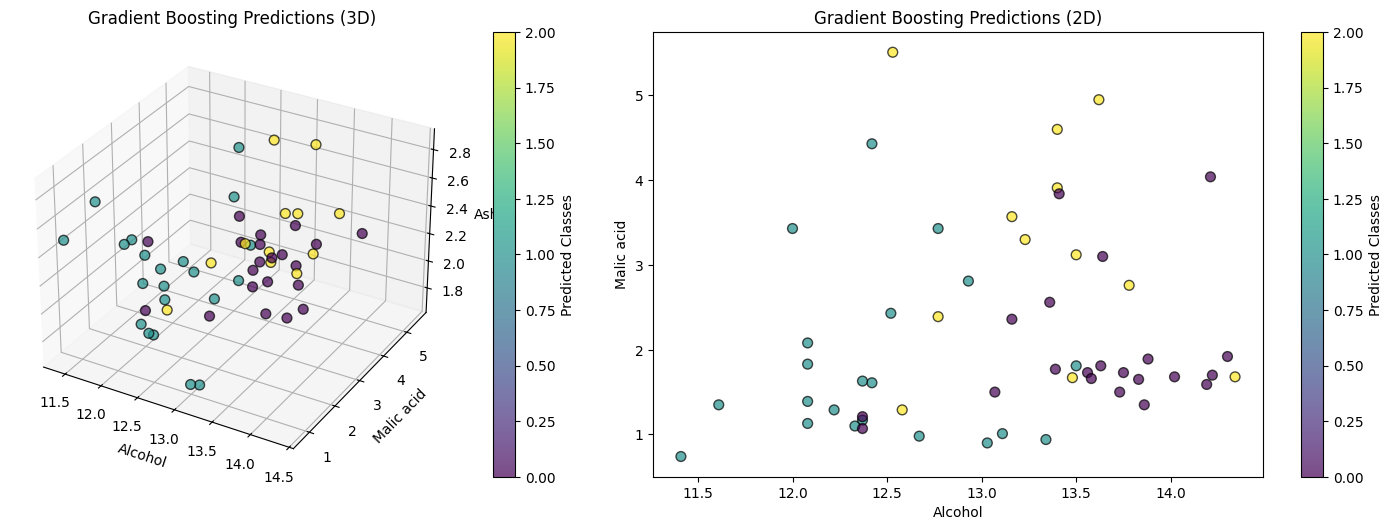

In [4]:
# Обучение модели бустинга
boosting_model = GradientBoostingClassifier(n_estimators=4, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

start_time = time.time()
boosting_model.fit(X_train, y_train)
end_time = time.time()

print(f"Время обучения: {end_time - start_time:.4f} с")

# Вычисление точности
accuracy_boosting = np.mean(y_pred_boosting == y_test)


print(f"Accuracy of Gradient Boosting: {accuracy_boosting:.2f}")

# Визуализация предсказаний
fig = plt.figure(figsize=(16, 10))



# 3D график для бустинга
ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], 
                       c=y_pred_boosting, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
ax3.set_title('Gradient Boosting Predictions (3D)')
ax3.set_xlabel('Alcohol')
ax3.set_ylabel('Malic acid')
ax3.set_zlabel('Ash')
plt.colorbar(scatter3, ax=ax3, label='Predicted Classes')

# 2D график для бустинга
ax4 = fig.add_subplot(224)
scatter4 = ax4.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], 
                       c=y_pred_boosting, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
ax4.set_title('Gradient Boosting Predictions (2D)')
ax4.set_xlabel('Alcohol')
ax4.set_ylabel('Malic acid')
plt.colorbar(scatter4, ax=ax4, label='Predicted Classes')

# Показываем график
plt.tight_layout()
plt.show()


4. Сравнить  результаты  работы  алгоритмов  (время  работы  и  качество моделей). Сделать выводы

Качество модели:
Accuracy для Бэггинга: 0.96
Accuracy Бустинга: 0.91

Время обучения:
Бэггинг: 0.0684 с
Бустинг: 0.0110 с

Так как обучение проходило на маленьком датасете wine, обучение в целом проходило быстро. Однако стоит заметить, что бэггинг все равно обучался быстрее и дал хоть и не на много, но чуть лучшее качество.